In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sem
import scipy.linalg as la
from math import *

In [2]:
def mesh(alpha, N):
    return np.sin(np.linspace(-pi/2+alpha,pi/2-alpha,N))/abs(sin((pi/2-alpha)))

In [3]:
def wall_units(yl, p, Re, plot=False):
    lstar=1/Re;
    As, Bs, Cs, Ds, z, w = sem.semhat(p)
    y_gll = np.zeros(0)
    for i in range(len(yl)-1):
        y_gll = np.append(y_gll, yl[i]+ (z+1.)/2. * (yl[i+1]-yl[i]))
    ym_vec = (y_gll[1:] - y_gll[:-1]) / lstar
    ym = max(ym_vec)
    y1 = ym_vec[1]
    y10=max(ym_vec[1:11])
    if plot:
        plt.plot(yl,np.ones(yl.size))
        plt.plot(y_gll,np.ones(y_gll.size))
    
    z_gll = np.zeros(0)
    zg = np.linspace(0,25,100663296/len(yl)/len(yl))
    for i in range(len(zg)-1):
        z_gll = np.append(z_gll, zg[i]+ (z+1.)/2. * (zg[i+1]-zg[i]))
    zn = max(z_gll[1:]-z_gll[:-1])/lstar
    return ym, y1, y10, zn

In [4]:
Nl=257
alp=0.3
poc=1

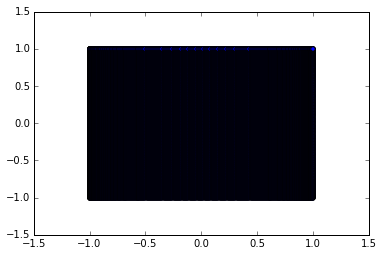

In [5]:
yl=mesh(alp, Nl)
xg = np.tile(yl, [Nl,1])
yg = xg.transpose()

xc=xg.flatten()
yc=yg.flatten()
plt.scatter(xc,yc)

In [6]:
Re=3000;
N=7
ym = 2; zm = 20
yl = mesh(alp, Nl)
while ym > 1 and zm > 10:
    ym, y1, y10, zm = wall_units(yl,N,Re)
    N = N + 1
    print(N, ym, y1, y10, zm)

8 6.52516263909 1.31073522954 1.95926218164 10.3069214332
9 5.6603185915 1.04175340462 1.69958187493 8.94084365954


In [7]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
N = 31
Nl = 65
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm = wall_units(yl,N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

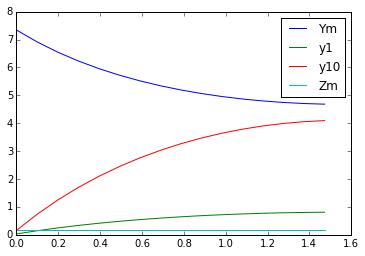

In [8]:
plt.plot(alphs,yms, label='Ym')
plt.plot(alphs,y1s, label='y1')
plt.plot(alphs,y10s, label='y10')
plt.plot(alphs,zms, label = 'Zm')
plt.legend()